[View in Colaboratory](https://colab.research.google.com/github/davidvela/testColabGH/blob/master/testElasticSearch.ipynb)

# ES
Elastic search testing <br>
localhost:9200

In [0]:
from datetime import datetime
import json 
from collections import namedtuple


host = 'http://localhost:9200/'
ref = 'accounts/person/1 '
url = host + ref 

In [0]:
doc = {
    'author': 'kimchy',
    'text': 'Elasticsearch: cool. bonsai cool.',
    'timestamp': datetime.now(),
}
person = {
      "name" : "John2",
      "lastname" : "Doe2",
      "job_description" : "22 windows Systems administrator and Linux specialit linux"
}

## elasticsearch python package

### Basic example ... 

In [0]:
from elasticsearch import Elasticsearch
es = Elasticsearch()

In [0]:
# indexing... 
res = es.index(index="test-index", doc_type='tweet', id=1, body=doc)
print(res['result'])

updated


In [0]:
res = es.get(index="test-index", doc_type='tweet', id=1)
# res = es.get(index="accounts", doc_type='person', id=1)
print(res)
print(res['_source'])

{'_index': 'test-index', '_type': 'tweet', '_id': '1', '_version': 3, 'found': True, '_source': {'author': 'kimchy', 'text': 'Elasticsearch: cool. bonsai cool. ch', 'timestamp': '2018-05-21T20:08:55.066455'}}
{'author': 'kimchy', 'text': 'Elasticsearch: cool. bonsai cool. ch', 'timestamp': '2018-05-21T20:08:55.066455'}


In [0]:
es.indices.refresh(index="test-index")

In [0]:
res = es.search(index="test-index", body={"query": {"match_all": {}} })
print("Got %d Hits:" % res['hits']['total'])
for hit in res['hits']['hits']:
    print("%(timestamp)s %(author)s: %(text)s" % hit["_source"])

Got 1 Hits:
2018-05-21T20:07:01.476602 kimchy: Elasticsearch: cool. bonsai cool.


### Features
* Persistent connections: ?
* Automatic Retries
* Sniffing 
* thread safety 
* SSL and Authentication
* Logging 

In [0]:
... 

Ellipsis

## Request library - HTTP lib

In [0]:
import requests 

In [0]:
# http://localhost:9200/test-index/tweet/1
ref = 'accounts/person/2 '
# ref = 'test-index/tweet/1 '
url = host + ref 
print(url)

headers = {'Content-type': 'application/json', 'Accept': 'text/plain'}


http://localhost:9200/accounts/person/2 


In [0]:
# ***** GET 
r = requests.get(url); show_r()

<Response [200]>
200
b'{"_index":"accounts","_type":"person","_id":"2 ","_version":3,"found":true,"_source":{"name": "John2", "lastname": "Doe2", "job_description": "22 windows Systems administrator and Linux specialit linux"}}'


In [0]:
# **** POST
# payload = {'username': 'bob', 'email': 'bob@bob.com'}
# r = requests.put("http://somedomain.org/endpoint", data=payload)
doc_data = person
query = json.dumps(doc_data)
r = requests.post(url, data=query, headers= headers); show_r()

<Response [200]>
200
b'{"_index":"accounts","_type":"person","_id":"2 ","_version":4,"result":"updated","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":3,"_primary_term":2}'


In [0]:
# ***** SEARCH
term = "windows"
query = json.dumps({
    "query": {
        "match": {
            "content": term
        }
    }
})
query = json.dumps({
    "query": {
        "match_all": { }
    }
})
url = host + ref + "_search"

print(url)
# r = requests.get(host, data=query); show_r() # 406 error - header not supported
r = requests.get(url, data=query, headers = headers); show_r()
# r = requests.get(url, params=query)

http://localhost:9200/accounts/person/_search
<Response [200]>
200
b'{"took":2,"timed_out":false,"_shards":{"total":5,"successful":5,"skipped":0,"failed":0},"hits":{"total":2,"max_score":1.0,"hits":[{"_index":"accounts","_type":"person","_id":"1 ","_score":1.0,"_source":{"name": "John", "lastname": "Doe", "job_description": "Systems administrator and Linux specialit"}},{"_index":"accounts","_type":"person","_id":"2 ","_score":1.0,"_source":{"name": "John2", "lastname": "Doe2", "job_description": "22 windows Systems administrator and Linux specialit linux"}}]}}'


In [0]:
# ***** SEARCH with HIGHLIGHT
# curl -X GET "localhost:9200/_search" -H 'Content-Type: application/json' 
# -d' { "query" : { "match": { "content": "kimchy" } }, "highlight" : { "fields" : { "content" : {} } } } '
# localhost:9200/_search?q=linux

term = "linux"
query = json.dumps({
    "query" : {
        "match": { "job_description": term }
    }
    ,
    "highlight" : {
        "fields" : {
            "job_description" : {}
        }
    }
})

# query = json.dumps({
#     "query": {
#         "match_all": {  }
#     }
# })
url = host + ref + "_search"

print(url)
print(query)
# r = requests.get(host, data=query); show_r() # 406 error - header not supported
r = requests.get(url, data=query, headers = headers); show_r()
# r = requests.get(url, params=query)

http://localhost:9200/accounts/person/_search
{"query": {"match": {"job_description": "linux"}}, "highlight": {"fields": {"job_description": {}}}}
<Response [200]>
200
b'{"took":5,"timed_out":false,"_shards":{"total":5,"successful":5,"skipped":0,"failed":0},"hits":{"total":2,"max_score":0.39556286,"hits":[{"_index":"accounts","_type":"person","_id":"2 ","_score":0.39556286,"_source":{"name": "John2", "lastname": "Doe2", "job_description": "22 windows Systems administrator and Linux specialit linux"},"highlight":{"job_description":["22 windows Systems administrator and <em>Linux</em> specialit <em>linux</em>"]}},{"_index":"accounts","_type":"person","_id":"1 ","_score":0.2876821,"_source":{"name": "John", "lastname": "Doe", "job_description": "Systems administrator and Linux specialit"},"highlight":{"job_description":["Systems administrator and <em>Linux</em> specialit"]}}]}}'


In [0]:
#GET localhost:9200/_search?q=john
# GET localhost:9200/_search?q=job_description:john
# GET localhost:9200/accounts/person/_search?q=job_description:linux

item = "job_description:linux"
# item = "john"

query = "_search?q="+item

ref = 'accounts/person/'
url = host + ref + query
print(url)
r = requests.get(url, headers = headers); show_r()

http://localhost:9200/accounts/person/_search?q=job_description:linux
<Response [200]>
200
b'{"took":167,"timed_out":false,"_shards":{"total":5,"successful":5,"skipped":0,"failed":0},"hits":{"total":2,"max_score":0.39556286,"hits":[{"_index":"accounts","_type":"person","_id":"2 ","_score":0.39556286,"_source":{"name": "John2", "lastname": "Doe2", "job_description": "22 windows Systems administrator and Linux specialit linux"}},{"_index":"accounts","_type":"person","_id":"1 ","_score":0.2876821,"_source":{"name": "John", "lastname": "Doe", "job_description": "Systems administrator and Linux specialit"}}]}}'


In [0]:
item = "job_description:linux"
# item = "john"

query = "_search?q="+item

ref = 'accounts/person/'
url = host + ref + query
print(url)
r = requests.get(url, headers = headers); show_r()

# curl 
# curl -X GET "localhost:9200/_search" -H 'Content-Type: application/json' 
# -d' { "query" : { "match": { "content": "kimchy" } }, "highlight" : { "fields" : { "content" : {} } } } '
# json: 
# {
#     "query" : {
#         "match": { "content": "kimchy" }
#     },
#     "highlight" : {
#         "fields" : {
#             "content" : {}
#         }
#     }
# }

In [0]:
# **** SHOW RESULTS 
def show_r():
    # {"_index":"test-index","_type":"tweet","_id":"1","_version":3,
    #  "found":true,
    #  "_source":{"author":"kimchy","text":"Elasticsearch: cool. bonsai cool. ch","timestamp":"2018-05-21T20:08:55.066455"}}
    print(r)
    print(r.status_code)
    print(r.content)

    # x = json.loads(cc, object_hook=lambda d: namedtuple('X', d.keys())(*d.values()))
    # print(x)

## others: httplib, urllib2

In [0]:
import httplib
connection =  httplib.HTTPConnection('1.2.3.4:1234')
body_content = 'BODY CONTENT GOES HERE'
connection.request('PUT', '/url/path/to/put/to', body_content)
result = connection.getresponse()
# Now result.status and result.reason contains interesting stuff

In [0]:
import urllib2
opener = urllib2.build_opener(urllib2.HTTPHandler)
request = urllib2.Request('http://example.org', data='your_put_data')
request.add_header('Content-Type', 'your/contenttype')
request.get_method = lambda: 'PUT'
url = opener.open(request)

# ES TC
Elastic Search - Text Classification<br><br>
my opinion... there is no spefic number of categories here... 
this kind of text classifcation is based on the **more like this query from elastic search**... this kind of search is able to give you some **hints** and implementing a bit of code in python is able to give you the top hit between all the similar documents in the elastic search. 

evaluation: 
- ++ easy to implement
- ++ great performance (no training time)
- -- poor accuracy and control over the predictions
- -- not a real algorithm to predict data and no interlligence
- __ all the data must be saved in the elastic search server ... otherwise it does not work! 

documentation: 
  * [Blog - turorial ](https://www.elastic.co/blog/text-classification-made-easy-with-elasticsearch) 
  * [Ingest - attachment plugin ](https://www.elastic.co/guide/en/elasticsearch/plugins/current/ingest-attachment.html) 
  
  

In [0]:
sample_mapping =   {
                      "properties":{
                         "content":{
                            "type":"text",
                            "analyzer":"german"
                         }
                      }
                    }

In [0]:
# language analyzer: 
curl -XGET "http://localhost:9200/_analyze?analyzer=english" -d'
  {
   "text" : "This is a test."
  }'
  {
    "tokens":[
       {
          "token":"test",
          "start_offset":10,
          "end_offset":14,
          "type":"<ALPHANUM>",
          "position":3
       }
    ]
  }

You just need to execute 4 steps:

1. Configure your mapping ("content" : "text", "category" : "keyword")
2. Index your documents
3. Run a More Like This Query [](MLT Query)](https://www.elastic.co/guide/en/elasticsearch/reference/current/query-dsl-mlt-query.html)
4. Write a small script that aggregates the hits of that query by score

## Queries example..

In [0]:
PUT sample
  POST sample/document/_mapping
  {
    "properties":{
       "content":{
          "type":"text",
          "analyzer":"english"
       },
       "category":{
          "type":"text",
          "analyzer":"english",
          "fields":{
             "raw":{
                "type":"keyword"
             }
          }
       }
    }
  }
  POST sample/document/1
  {
    "category":"Apple (Fruit)",
    "content":"Granny Smith, Royal Gala, Golden Delicious and Pink Lady are just a few of the thousands of different kinds of apple that are grown around the world! You can make dried apple rings at home - ask an adult to help you take out the core, thinly slice the apple and bake the rings in the oven at a low heat."
  }
  POST sample/document/2
  {
    "category":"Apple (Company)",
    "content":"Apple is an American multinational technology company headquartered in Cupertino, California, that designs, develops, and sells consumer electronics, computer software, and online services. Its hardware products include the iPhone smartphone, the iPad tablet computer, the Mac personal computer, the iPod portable media player, the Apple Watch smartwatch, and the Apple TV digital media player. Apple's consumer software includes the macOS and iOS operating systems, the iTunes media player, the Safari web browser, and the iLife and iWork creativity and productivity suites. Its online services include the iTunes Store, the iOS App Store and Mac App Store, Apple Music, and iCloud."
  }


GET sample/document/_search
  {
    "query":{
       "more_like_this":{
          "fields":[
             "content",
             "category"
          ],
          "like":"The apple tree (Malus pumila, commonly and erroneously called Malus domestica) is a deciduous tree in the rose family best known for its sweet, pomaceous fruit, the apple. It is cultivated worldwide as a fruit tree, and is the most widely grown species in the genus Malus. The tree originated in Central Asia, where its wild ancestor, Malus sieversii, is still found today. Apples have been grown for thousands of years in Asia and Europe, and were brought to North America by European colonists. Apples have religious and mythological significance in many cultures, including Norse, Greek and European Christian traditions.",
          "min_term_freq":1,
          "max_query_terms":20
       }
    }
  }


## python script 

In [0]:
# And here's a little Python script that processes the response and returns the most likely category for the input document.

from operator import itemgetter
  def get_best_category(response):
     categories = {}
     for hit in response['hits']['hits']:
         score = hit['_score']
         for category in hit['_source']['category']: 
             if category not in categories:
                 categories[category] = score
             else:
                 categories[category] += score
     if len(categories) > 0:
         sortedCategories = sorted(categories.items(), key=itemgetter(1), reverse=True)
         category = sortedCategories[0][0]
     return category

## article summary

Use cases
Classification of text is a very common real world use case for NLP. Think of e-commerce data (products). Lots of people run e-commerce shops with affiliate links. The data is provided by several shops and often comes with a category tag. But each shop has another category tag. So the category systems need to be unified and hence all the data needs to be re-classified according to the new category tree. Or think of a Business Intelligence application where company websites need to be classified according to their sector (hairdresser vs. bakery etc).

Evaluation
I evaluated this approach with a standard text classification dataset: The 20 Newsgroups dataset. The highest precision (92% correct labels) was achieved with a high quality score threshold that included only 12% of the documents. When labelling all documents (100% Recall) 72% of the predictions were correct.

The best algorithms for text classification on the 20 Newsgroups dataset are usually SVM and Naive Bayes. They have a higher average accuracy on the entire dataset.

So why should you consider using Elasticsearch for classification if there are better algorithms?

There are a few practical reasons: training an SVM model takes a lot of time. Especially when you work in a startup or you need to adapt quickly for different customers or use cases that might become a real problem. So you may not be able to retrain your model every time your data changes. I experienced it myself working on a project for a big German bank. Hence you will work with outdated models and those will for sure not score that good anymore.

With the Elasticsearch approach training happens at index time and your model can be updated dynamically at any point in time with zero downtime of your application. If your data is stored in Elasticsearch anyway, you don't need any additional infrastructure. With over 10% highly accurate results you can usually fill the first page. In many applications that's enough for a first good impression.

Why then use Elasticsearch when there are other tools?

Because your data is already there and it's going to pre-compute the underlying statistics anyway. It's almost like you get some NLP for free!

# TC 
Text Classification

# TC TH - text classification tutorial
<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/tensorflow/hub/blob/master/docs/tutorials/text_classification_with_tf_hub.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/tensorflow/hub/blob/master/docs/tutorials/text_classification_with_tf_hub.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>
<br><br><br>

data:  [Large Movie Review Dataset v1.0](http://ai.stanford.edu/~amaas/data/sentiment/) 

The dataset consists of IMDB movie reviews labeled by positivity from 1 to 10. 

The task is to label the reviews as **negative** or **positive**.


In [2]:
# script:
#Import----------------------------------------------------------------------
# >>> Preparing environment
# Install the latest Tensorflow version.
!pip install --quiet "tensorflow>=1.7"
# Install TF-Hub.
!pip install tensorflow-hub
!pip install seaborn
# >>>>> import libraries
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
# data------------------------------------------------------------------------- 
# Load all files from a directory in a DataFrame.
def load_directory_data(directory):
  data = {}
  data["sentence"] = []
  data["sentiment"] = []
  for file_path in os.listdir(directory):
    with tf.gfile.GFile(os.path.join(directory, file_path), "r") as f:
      data["sentence"].append(f.read())
      data["sentiment"].append(re.match("\d+_(\d+)\.txt", file_path).group(1))
  return pd.DataFrame.from_dict(data)

# Merge positive and negative examples, add a polarity column and shuffle.
def load_dataset(directory):
  pos_df = load_directory_data(os.path.join(directory, "pos"))
  neg_df = load_directory_data(os.path.join(directory, "neg"))
  pos_df["polarity"] = 1
  neg_df["polarity"] = 0
  return pd.concat([pos_df, neg_df]).sample(frac=1).reset_index(drop=True)

# Download and process the dataset files.
def download_and_load_datasets(force_download=False):
  dataset = tf.keras.utils.get_file(
      fname="aclImdb.tar.gz", 
      origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
      extract=True)
  
  train_df = load_dataset(os.path.join(os.path.dirname(dataset), "aclImdb", "train"))
  test_df = load_dataset(os.path.join(os.path.dirname(dataset), "aclImdb", "test"))
  return train_df, test_df

# Reduce logging output.
tf.logging.set_verbosity(tf.logging.ERROR)

#TODO: LOAD THEM LOCALLY IF NOT -> DOWNLOAD
train_df, test_df = download_and_load_datasets()
# train_df.head()

#Model------------------------------------------------------------------------
# Training input on the whole training set with no limit on training epochs.
train_input_fn = tf.estimator.inputs.pandas_input_fn(
    train_df, train_df["polarity"], num_epochs=None, shuffle=True)

# Prediction on the whole training set.
predict_train_input_fn = tf.estimator.inputs.pandas_input_fn(
    train_df, train_df["polarity"], shuffle=False)
# Prediction on the test set.
predict_test_input_fn = tf.estimator.inputs.pandas_input_fn(
    test_df, test_df["polarity"], shuffle=False)

#load tfhub component .... (time consuming!)
embedded_text_feature_column = hub.text_embedding_column(
    key="sentence", 
    module_spec="https://tfhub.dev/google/nnlm-en-dim128/1")
#>>> estimator 
estimator = tf.estimator.DNNClassifier(
    hidden_units=[500, 100],
    feature_columns=[embedded_text_feature_column],
    n_classes=2,
    optimizer=tf.train.AdagradOptimizer(learning_rate=0.003))

#>>> training------------------------------------------------------------------ 
# Training for 1,000 steps means 128,000 training examples with the default
# batch size. This is roughly equivalent to 5 epochs since the training dataset
# contains 25,000 examples.
estimator.train(input_fn=train_input_fn, steps=1000);

84131840/84125825 [==============================] - 7s 0us/step


In [3]:
#------------------------------------------------------------------------
# TESTS------------------------------------------------------------------------
#------------------------------------------------------------------------
#>>>> new data 
test_df  # .columns # Index(['sentence', 'sentiment', 'polarity'], dtype='object')
d =  { 'sentence': ['I liked the movie', 
                    'I hate the movie', 
                    'I like the movie but I hate the book', 
                    'I dont like the book ',
                    'I loved it'], 
      'sentiment': [8, 1, 6, 7, 9], 
      'polarity': [1, 0, 1, 1, 1] }


new_df = pd.DataFrame(data=d)
# new_df

predict_new_input_fn = tf.estimator.inputs.pandas_input_fn(
    new_df, new_df["polarity"], shuffle=False)

# new_eval_result = estimator.evaluate(input_fn=predict_new_input_fn)
new_pred_result = estimator.predict(input_fn=predict_new_input_fn)

# template = ('\nPrediction is "{}" ({:.1f}%), expected "{}"')
# print(template.format(iris_data.SPECIES[class_id],
#                       100 * probability, expec))

for pred_dict in zip(new_pred_result): 
  print( pred_dict )
  print( pred_dict[0]["probabilities"]  )
#   print( "prob to be 0: {} " .format( pred_dict["probabilities"][0] ) )

({'logits': array([0.67393905], dtype=float32), 'logistic': array([0.66238457], dtype=float32), 'probabilities': array([0.33761537, 0.66238457], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object)},)
[0.33761537 0.66238457]
({'logits': array([-1.4182086], dtype=float32), 'logistic': array([0.19494256], dtype=float32), 'probabilities': array([0.8050574 , 0.19494256], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object)},)
[0.8050574  0.19494256]
({'logits': array([-1.0530326], dtype=float32), 'logistic': array([0.25864318], dtype=float32), 'probabilities': array([0.7413568 , 0.25864315], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object)},)
[0.7413568  0.25864315]
({'logits': array([-1.2170464], dtype=float32), 'logistic': array([0.22845665], dtype=float32), 'probabilities': array([0.7715433 , 0.22845665], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object)},)
[0.7715433  0.22

In [6]:
print(d['sentence'][0])
# print(new_df[0])  # error ... TODO: FIX
new_df

I liked the movie


,polarity,sentence,sentiment
0,1,I liked the movie,8
1,0,I hate the movie,1
2,1,I like the movie but I hate the book,6
3,1,I dont like the book,7
4,1,I loved it,9


In [1]:
print("test")

test


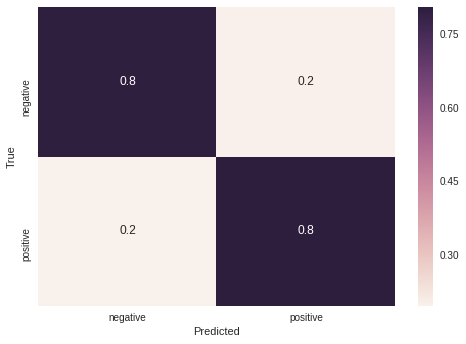

In [4]:
# Visualization----------------------------------------------------------------
# confusion matrix: 
def get_predictions(estimator, input_fn):
  return [x["class_ids"][0] for x in estimator.predict(input_fn=input_fn)]

LABELS = [
    "negative", "positive"
]

# Create a confusion matrix on training data.
with tf.Graph().as_default():
  cm = tf.confusion_matrix(train_df["polarity"], 
                           get_predictions(estimator, predict_train_input_fn))
  with tf.Session() as session:
    cm_out = session.run(cm)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) / cm_out.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_out, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.xlabel("Predicted");
plt.ylabel("True");


